In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
import scipy
from scipy import signal, random
import matplotlib.pylab as plt
%matplotlib inline

This `%matplotlib` command is an ipython magic which inlines all matplotlib figures in the notebook.

In [4]:
T = 1      # signal length in seconds
f0 = 20    # main signal frequency
fs = 2000  # sampling frequency
time  = np.linspace(0, T, fs*T)
noise = 0.5*random.randn(time.shape[0]) + 0.5*np.cos(2*np.pi*f0*time/10)
sig_o = np.cos(2*np.pi*f0*time)
sig_n = sig_o + noise

In [5]:
def plot_signal(t, s, fs):
    freq, psd = signal.periodogram(s, fs, scaling='spectrum')
    plt.figure()
    plt.subplot(211)
    plt.plot(t, s)
    plt.subplot(212)
    plt.semilogy(freq, psd)
    plt.ylim([1e-7, 1e2])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD')
    plt.show()
    

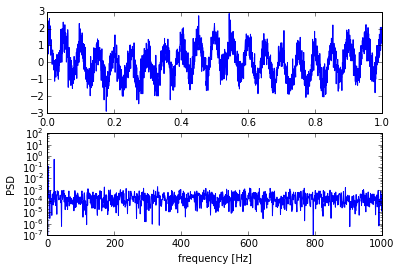

In [6]:
plot_signal(time, sig_n, fs)

In [7]:
# Create filter
cutoff_l = 0.8 * f0
cutoff_h = 1.2 * f0
band_pass = (2. / fs) * np.array([cutoff_l, cutoff_h], dtype=np.float)
fb, fa = signal.butter(3, band_pass, btype='band')
w, h = signal.freqz(fb, fa)

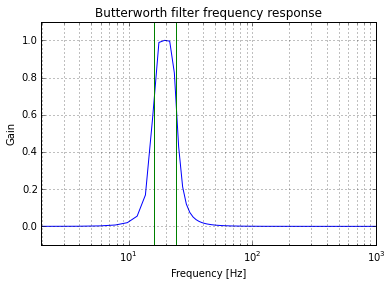

In [8]:
# Plot filter
plt.semilogx((fs * 0.5 / np.pi) * w, abs(h))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(cutoff_l, color='green') # low cutoff frequency
plt.axvline(cutoff_h, color='green') # high cutoff frequency
plt.show()

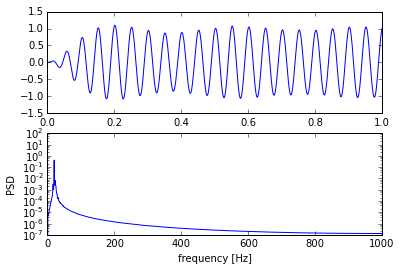

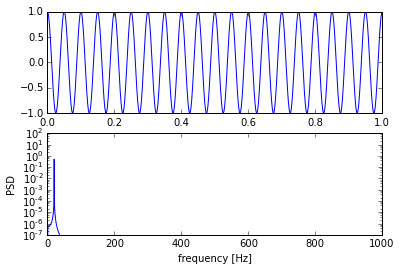

In [9]:
sig_f = signal.lfilter(fb, fa, sig_n)
plot_signal(time, sig_f, fs)
plot_signal(time, sig_o, fs)